# IBM Applied Data Science Capstone Course by Coursera



<h1 align=center><font size = 5>*Battle of neighbourhoods in Mumbai City for Opening a New Shopping , India*</font></h1>


**Week 5 Final Report**


Part1:Build a dataframe of neighborhoods in Mumbai by web scraping the data from Wikipedia page

Part2:Get the geographical coordinates of the neighborhoods
Obtain the venue data for the neighborhoods from Foursquare API

Part3:Explore and cluster the neighborhoods
Select the best cluster to open a new shopping mall

# ***Part 1***

# 1) Import libraries

In [51]:
!pip install geopy
!pip install geocoder
!pip install folium

In [52]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

import json # library to handle JSON files

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import geocoder
import requests # library to handle requests
from bs4 import BeautifulSoup # library to parse HTML and XML documents

from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
# import k-means from clustering stage
from sklearn.cluster import KMeans

import folium # map rendering library
from sklearn.metrics import silhouette_score
print("Libraries imported.")

Libraries imported.


## 2) Webscraping for weblink



In [53]:
mum_df = pd.read_html('https://en.wikipedia.org/wiki/List_of_neighbourhoods_in_Mumbai')[-1]
mum_df.rename(columns={'Area': 'Neighborhood'}, inplace=True)
mum_df.head(10)

,Neighborhood,Location,Latitude,Longitude
0,Amboli,"Andheri,Western Suburbs",19.129300,72.843400
1,"Chakala, Andheri",Western Suburbs,19.111388,72.860833
2,D.N. Nagar,"Andheri,Western Suburbs",19.124085,72.831373
3,Four Bungalows,"Andheri,Western Suburbs",19.124714,72.827210
4,Lokhandwala,"Andheri,Western Suburbs",19.130815,72.829270
5,Marol,"Andheri,Western Suburbs",19.119219,72.882743
6,Sahar,"Andheri,Western Suburbs",19.098889,72.867222
7,Seven Bungalows,"Andheri,Western Suburbs",19.129052,72.817018
8,Versova,"Andheri,Western Suburbs",19.120000,72.820000
9,Mira Road,"Mira-Bhayandar,Western Suburbs",19.284167,72.871111


# 3)DATA WRANGLING

In [54]:
mum_df['Location'].value_counts()

South Mumbai                       30
Andheri,Western Suburbs             8
Western Suburbs                     6
Eastern Suburbs                     4
Bandra,Western Suburbs              3
Ghatkopar,Eastern Suburbs           3
Kandivali West,Western Suburbs      3
Powai,Eastern Suburbs               3
Mira-Bhayandar,Western Suburbs      3
Borivali (West),Western Suburbs     2
Vasai,Western Suburbs               2
Goregaon,Western Suburbs            2
Khar,Western Suburbs                2
Kalbadevi,South Mumbai              2
Malad,Western Suburbs               2
Harbour Suburbs                     2
Mumbai                              2
Vile Parle,Western Suburbs          1
Byculla,South Mumbai                1
Mulund,Eastern Suburbs              1
Sanctacruz,Western Suburbs          1
Kamathipura,South Mumbai            1
Govandi,Harbour Suburbs             1
Kurla,Eastern Suburbs               1
Fort,South Mumbai                   1
Kandivali East,Western Suburbs      1
Antop Hill,S

In [55]:
mum_df['Location'] = mum_df['Location'].apply(lambda x: x.split(',')[-1])
mum_df.head(10)

,Neighborhood,Location,Latitude,Longitude
0,Amboli,Western Suburbs,19.129300,72.843400
1,"Chakala, Andheri",Western Suburbs,19.111388,72.860833
2,D.N. Nagar,Western Suburbs,19.124085,72.831373
3,Four Bungalows,Western Suburbs,19.124714,72.827210
4,Lokhandwala,Western Suburbs,19.130815,72.829270
5,Marol,Western Suburbs,19.119219,72.882743
6,Sahar,Western Suburbs,19.098889,72.867222
7,Seven Bungalows,Western Suburbs,19.129052,72.817018
8,Versova,Western Suburbs,19.120000,72.820000
9,Mira Road,Western Suburbs,19.284167,72.871111


In [56]:
mum_df['Location'].value_counts()


South Mumbai       39
Western Suburbs    36
Eastern Suburbs    12
Harbour Suburbs     4
Mumbai              2
Name: Location, dtype: int64

In [57]:
mum_df

,Neighborhood,Location,Latitude,Longitude
0,Amboli,Western Suburbs,19.129300,72.843400
1,"Chakala, Andheri",Western Suburbs,19.111388,72.860833
2,D.N. Nagar,Western Suburbs,19.124085,72.831373
3,Four Bungalows,Western Suburbs,19.124714,72.827210
4,Lokhandwala,Western Suburbs,19.130815,72.829270
5,Marol,Western Suburbs,19.119219,72.882743
6,Sahar,Western Suburbs,19.098889,72.867222
7,Seven Bungalows,Western Suburbs,19.129052,72.817018
8,Versova,Western Suburbs,19.120000,72.820000
9,Mira Road,Western Suburbs,19.284167,72.871111


In [58]:
mum_df['Latitude1'] = None
mum_df['Longitude1'] = None

for i, neigh in enumerate(mum_df['Neighborhood']):
    lat_lng_coords = None
    
    while(lat_lng_coords is None):
        g = geocoder.arcgis('{}, Mumbai, India'.format(neigh))
        lat_lng_coords = g.latlng
    
    if lat_lng_coords:
        latitude = lat_lng_coords[0]
        longitude = lat_lng_coords[1]
    
    mum_df.loc[i, 'Latitude1'] = latitude
    mum_df.loc[i, 'Longitude1'] = longitude

mum_df.head(10)

,Neighborhood,Location,Latitude,Longitude,Latitude1,Longitude1
0,Amboli,Western Suburbs,19.129300,72.843400,19.1291,72.8464
1,"Chakala, Andheri",Western Suburbs,19.111388,72.860833,19.1084,72.8623
2,D.N. Nagar,Western Suburbs,19.124085,72.831373,19.1251,72.8325
3,Four Bungalows,Western Suburbs,19.124714,72.827210,19.1264,72.8242
4,Lokhandwala,Western Suburbs,19.130815,72.829270,19.1432,72.8249
5,Marol,Western Suburbs,19.119219,72.882743,19.1191,72.8828
6,Sahar,Western Suburbs,19.098889,72.867222,19.1027,72.8626
7,Seven Bungalows,Western Suburbs,19.129052,72.817018,19.1286,72.8212
8,Versova,Western Suburbs,19.120000,72.820000,19.1377,72.8135
9,Mira Road,Western Suburbs,19.284167,72.871111,19.2656,72.8706


In [59]:
mum_df['Latdiff'] = abs(mum_df['Latitude'] - mum_df['Latitude1'])
mum_df['Longdiff'] = abs(mum_df['Longitude'] - mum_df['Longitude1'])
mum_df.head(10)

,Neighborhood,Location,Latitude,Longitude,Latitude1,Longitude1,Latdiff,Longdiff
0,Amboli,Western Suburbs,19.129300,72.843400,19.1291,72.8464,0.00024,0.00304
1,"Chakala, Andheri",Western Suburbs,19.111388,72.860833,19.1084,72.8623,0.003028,0.001497
2,D.N. Nagar,Western Suburbs,19.124085,72.831373,19.1251,72.8325,0.000965,0.001107
3,Four Bungalows,Western Suburbs,19.124714,72.827210,19.1264,72.8242,0.001666,0.00301
4,Lokhandwala,Western Suburbs,19.130815,72.829270,19.1432,72.8249,0.012345,0.0044
5,Marol,Western Suburbs,19.119219,72.882743,19.1191,72.8828,0.000169,6.7e-05
6,Sahar,Western Suburbs,19.098889,72.867222,19.1027,72.8626,0.00377822,0.00462255
7,Seven Bungalows,Western Suburbs,19.129052,72.817018,19.1286,72.8212,0.000492,0.004162
8,Versova,Western Suburbs,19.120000,72.820000,19.1377,72.8135,0.01769,0.00652
9,Mira Road,Western Suburbs,19.284167,72.871111,19.2656,72.8706,0.0185438,0.000467611


In [60]:
mum_df.loc[mum_df.Latdiff>0.001, 'Latitude'] = mum_df.loc[mum_df.Latdiff>0.001, 'Latitude1']
mum_df.loc[mum_df.Longdiff>0.001, 'Longitude'] = mum_df.loc[mum_df.Longdiff>0.001, 'Longitude1']
mum_df.head(10)

,Neighborhood,Location,Latitude,Longitude,Latitude1,Longitude1,Latdiff,Longdiff
0,Amboli,Western Suburbs,19.1293,72.8464,19.1291,72.8464,0.00024,0.00304
1,"Chakala, Andheri",Western Suburbs,19.1084,72.8623,19.1084,72.8623,0.003028,0.001497
2,D.N. Nagar,Western Suburbs,19.1241,72.8325,19.1251,72.8325,0.000965,0.001107
3,Four Bungalows,Western Suburbs,19.1264,72.8242,19.1264,72.8242,0.001666,0.00301
4,Lokhandwala,Western Suburbs,19.1432,72.8249,19.1432,72.8249,0.012345,0.0044
5,Marol,Western Suburbs,19.1192,72.8827,19.1191,72.8828,0.000169,6.7e-05
6,Sahar,Western Suburbs,19.1027,72.8626,19.1027,72.8626,0.00377822,0.00462255
7,Seven Bungalows,Western Suburbs,19.1291,72.8212,19.1286,72.8212,0.000492,0.004162
8,Versova,Western Suburbs,19.1377,72.8135,19.1377,72.8135,0.01769,0.00652
9,Mira Road,Western Suburbs,19.2656,72.8711,19.2656,72.8706,0.0185438,0.000467611


In [61]:
mum_df.where(mum_df['Latitude']==mum_df['Latitude1'])

,Neighborhood,Location,Latitude,Longitude,Latitude1,Longitude1,Latdiff,Longdiff
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Chakala, Andheri",Western Suburbs,19.1084,72.8623,19.1084,72.8623,0.003028,0.001497
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Four Bungalows,Western Suburbs,19.1264,72.8242,19.1264,72.8242,0.001666,0.00301
4,Lokhandwala,Western Suburbs,19.1432,72.8249,19.1432,72.8249,0.012345,0.0044
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Sahar,Western Suburbs,19.1027,72.8626,19.1027,72.8626,0.00377822,0.00462255
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Versova,Western Suburbs,19.1377,72.8135,19.1377,72.8135,0.01769,0.00652
9,Mira Road,Western Suburbs,19.2656,72.8711,19.2656,72.8706,0.0185438,0.000467611


In [62]:
mum_df.where(mum_df['Longitude']==mum_df['Longitude1'])

,Neighborhood,Location,Latitude,Longitude,Latitude1,Longitude1,Latdiff,Longdiff
0,Amboli,Western Suburbs,19.1293,72.8464,19.1291,72.8464,0.00024,0.00304
1,"Chakala, Andheri",Western Suburbs,19.1084,72.8623,19.1084,72.8623,0.003028,0.001497
2,D.N. Nagar,Western Suburbs,19.1241,72.8325,19.1251,72.8325,0.000965,0.001107
3,Four Bungalows,Western Suburbs,19.1264,72.8242,19.1264,72.8242,0.001666,0.00301
4,Lokhandwala,Western Suburbs,19.1432,72.8249,19.1432,72.8249,0.012345,0.0044
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Sahar,Western Suburbs,19.1027,72.8626,19.1027,72.8626,0.00377822,0.00462255
7,Seven Bungalows,Western Suburbs,19.1291,72.8212,19.1286,72.8212,0.000492,0.004162
8,Versova,Western Suburbs,19.1377,72.8135,19.1377,72.8135,0.01769,0.00652
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
mum_df.drop(['Latitude1', 'Longitude1', 'Latdiff', 'Longdiff'], axis=1, inplace=True)
mum_df.head(10)

,Neighborhood,Location,Latitude,Longitude
0,Amboli,Western Suburbs,19.1293,72.8464
1,"Chakala, Andheri",Western Suburbs,19.1084,72.8623
2,D.N. Nagar,Western Suburbs,19.1241,72.8325
3,Four Bungalows,Western Suburbs,19.1264,72.8242
4,Lokhandwala,Western Suburbs,19.1432,72.8249
5,Marol,Western Suburbs,19.1192,72.8827
6,Sahar,Western Suburbs,19.1027,72.8626
7,Seven Bungalows,Western Suburbs,19.1291,72.8212
8,Versova,Western Suburbs,19.1377,72.8135
9,Mira Road,Western Suburbs,19.2656,72.8711


In [64]:
neighborhoods_mumbai = mum_df.groupby('Location')['Neighborhood'].nunique()
neighborhoods_mumbai

Location
Eastern Suburbs    12
Harbour Suburbs     4
Mumbai              2
South Mumbai       39
Western Suburbs    36
Name: Neighborhood, dtype: int64

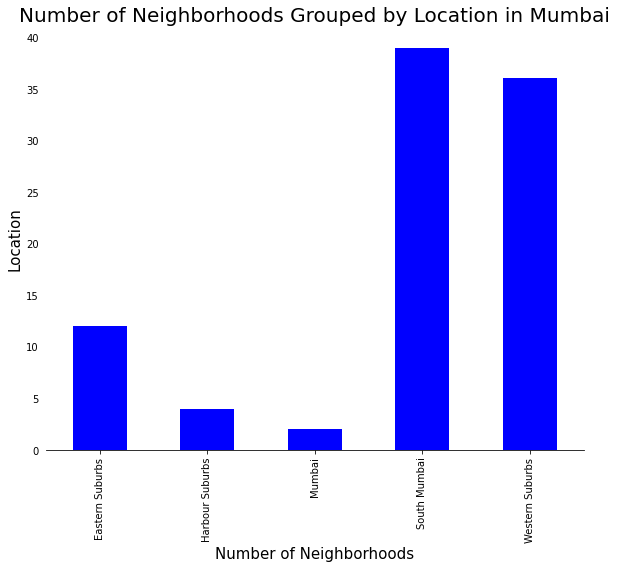

In [65]:
fig = plt.figure(figsize=(9,8))

ax = neighborhoods_mumbai.plot(kind='bar', color='blue')
ax.set_title('Number of Neighborhoods Grouped by Location in Mumbai', fontsize=20)
ax.set_xlabel('Number of Neighborhoods', fontsize=15)
ax.set_ylabel('Location', fontsize=15)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(which='major', left=False)

fig.tight_layout()


## ***Part2***

# 4)Get the geographical coordinates

In [66]:
address = 'Mumbai, IN'
geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of Mumbai are {}, {}.'.format(latitude, longitude))

/usr/local/lib/python3.7/dist-packages/geopy/geocoders/osm.py:143: UserWarning: Using Nominatim with the default "geopy/1.17.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  UserWarning


The geograpical coordinates of Mumbai are 19.0759899, 72.8773928.


# 5)Create a map of MUMBAI CITY with neighborhoods superimposed on top

In [67]:
map_mumbai = folium.Map(location=[latitude, longitude], zoom_start=10)

for lat, lng, location, neighborhood in zip(mum_df['Latitude'], mum_df['Longitude'], mum_df['Location'], mum_df['Neighborhood']):
    label = '{}, {}'.format(neighborhood, location)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='purple',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_mumbai)  
    
map_mumbai

# 6)Use the Foursquare API to explore the neighborhoods

In [68]:
# define Foursquare Credentials and Version
CLIENT_ID = '3AA5LC0213HGBMVNE0LBTGS3B3155CJXQS25FJXD20A22SF4' # your Foursquare ID
CLIENT_SECRET = '0EMHYLFU0OTP4UDHXRE4XLQR4DO2KUJC3MTT4THZWGHVD04J' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 3AA5LC0213HGBMVNE0LBTGS3B3155CJXQS25FJXD20A22SF4
CLIENT_SECRET:0EMHYLFU0OTP4UDHXRE4XLQR4DO2KUJC3MTT4THZWGHVD04J


In [69]:
neighborhood_name = mum_df.loc[0, 'Neighborhood']
neighborhood_lat = mum_df.loc[0, 'Latitude']
neighborhood_long = mum_df.loc[0, 'Longitude']

print("The neighborhood is {} and it's geographical coordinates are {} latitude and {} longitude".format(neighborhood_name,
                                                                                                        neighborhood_lat, neighborhood_long))

The neighborhood is Amboli and it's geographical coordinates are 19.1293 latitude and 72.84644000000003 longitude


# 7)Now, let's get the top 100 venues that are within a radius of 2000 meters.

In [70]:
LIMIT = 100
radius = 2000

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_lat, 
    neighborhood_long, 
    radius, 
    LIMIT)

In [71]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '60bec123fa2f3075bd23b111'},
 'response': {'groups': [{'items': [{'reasons': {'count': 0,
       'items': [{'reasonName': 'globalInteractionReason',
         'summary': 'This spot is popular',
         'type': 'general'}]},
      'referralId': 'e-0-4e4eb3c68877402b06b92160-0',
      'venue': {'categories': [{'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/asian_',
          'suffix': '.png'},
         'id': '4bf58dd8d48988d145941735',
         'name': 'Chinese Restaurant',
         'pluralName': 'Chinese Restaurants',
         'primary': True,
         'shortName': 'Chinese'}],
       'id': '4e4eb3c68877402b06b92160',
       'location': {'address': 'Pali Naka, Bandra west',
        'cc': 'IN',
        'city': 'Mumbai',
        'country': 'India',
        'distance': 148,
        'formattedAddress': ['Pali Naka, Bandra west',
         'Mumbai',
         'Mahārāshtra',
         'India'],
        'labeledLatLngs': [{'label': 'display',
 

In [72]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [73]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues)

filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues = nearby_venues.loc[:, filtered_columns]

nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


,name,categories,lat,lng
0,"5 Spice , Bandra",Chinese Restaurant,19.130421,72.847206
1,Jaffer Bhai's Delhi Darbar,Mughlai Restaurant,19.137714,72.845909
2,Merwans Cake shop,Bakery,19.119300,72.845418
3,Narayan Sandwich,Sandwich Place,19.121398,72.850270
4,Cafe Arfa,Indian Restaurant,19.128930,72.847140


In [74]:
print("{} venues were returned for {} by Foursquare".format(len(nearby_venues), neighborhood_name))

82 venues were returned for Amboli by Foursquare


# **Part3**

# 8)Generalizing Foursquare API

Now that we have seen how the API call works and how we can clean our data to get relevant information, we can generalize this procedure to get nearby venues for all neighborhoods by creating the function getNearbyVenues.

In [75]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [76]:
mumbai_venues = getNearbyVenues(names=mum_df['Neighborhood'], latitudes=mum_df['Latitude'], longitudes=mum_df['Longitude'], radius=radius)

Amboli
Chakala, Andheri
D.N. Nagar
Four Bungalows
Lokhandwala
Marol
Sahar
Seven Bungalows
Versova
Mira Road
Bhayandar
Uttan
Bandstand Promenade
Kherwadi
Pali Hill
I.C. Colony
Gorai
Dahisar
Aarey Milk Colony
Bangur Nagar
Jogeshwari West
Juhu
Charkop
Poisar
Mahavir Nagar
Thakur village
Pali Naka
Khar Danda
Dindoshi
Sunder Nagar
Kalina
Naigaon
Nalasopara
Virar
Irla
Vile Parle
Bhandup
Amrut Nagar
Asalfa
Pant Nagar
Kanjurmarg
Nehru Nagar
Nahur
Chandivali
Hiranandani Gardens
Indian Institute of Technology Bombay campus
Vidyavihar
Vikhroli
Chembur
Deonar
Mankhurd
Mahul
Agripada
Altamount Road
Bhuleshwar
Breach Candy
Carmichael Road
Cavel
Churchgate
Cotton Green
Cuffe Parade
Cumbala Hill
Currey Road
Dhobitalao
Dongri
Kala Ghoda
Kemps Corner
Lower Parel
Mahalaxmi
Mahim
Malabar Hill
Marine Drive
Marine Lines
Mumbai Central
Nariman Point
Prabhadevi
Sion
Walkeshwar
Worli
C.G.S. colony
Dagdi Chawl
Navy Nagar
Hindu colony
Ballard Estate
Chira Bazaar
Fanas Wadi
Chor Bazaar
Matunga
Parel
Gowalia Tank


In [77]:
print(mumbai_venues.shape)
mumbai_venues.head(10)

(7161, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Amboli,19.1293,72.84644,"5 Spice , Bandra",19.130421,72.847206,Chinese Restaurant
1,Amboli,19.1293,72.84644,Jaffer Bhai's Delhi Darbar,19.137714,72.845909,Mughlai Restaurant
2,Amboli,19.1293,72.84644,Merwans Cake shop,19.119300,72.845418,Bakery
3,Amboli,19.1293,72.84644,Narayan Sandwich,19.121398,72.850270,Sandwich Place
4,Amboli,19.1293,72.84644,Cafe Arfa,19.128930,72.847140,Indian Restaurant
5,Amboli,19.1293,72.84644,Hard Rock Cafe Andheri,19.135995,72.835335,American Restaurant
6,Amboli,19.1293,72.84644,Pizza Express,19.131893,72.834668,Pizza Place
7,Amboli,19.1293,72.84644,Mainland China,19.140391,72.838033,Chinese Restaurant
8,Amboli,19.1293,72.84644,Doolally Taproom,19.135917,72.833094,Brewery
9,Amboli,19.1293,72.84644,Joey's Pizza,19.126762,72.830001,Pizza Place


In [78]:
mumbai_venues.groupby(['Neighborhood']).count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Aarey Milk Colony,45,45,45,45,45,45
Agripada,67,67,67,67,67,67
Altamount Road,98,98,98,98,98,98
Amboli,82,82,82,82,82,82
Amrut Nagar,89,89,89,89,89,89
Asalfa,93,93,93,93,93,93
Ballard Estate,100,100,100,100,100,100
Bandstand Promenade,88,88,88,88,88,88
Bangur Nagar,100,100,100,100,100,100


In [79]:
print("There are {} unique categories".format(mumbai_venues['Venue Category'].nunique()))

There are 218 unique categories


In [80]:
# print out the list of categories
mumbai_venues['Venue Category'].unique()[:50]

array(['Chinese Restaurant', 'Mughlai Restaurant', 'Bakery',
       'Sandwich Place', 'Indian Restaurant', 'American Restaurant',
       'Pizza Place', 'Brewery', 'Ice Cream Shop', 'Pub', 'Café',
       'BBQ Joint', 'Multiplex', 'Lounge', 'Diner', 'Juice Bar',
       'Fast Food Restaurant', 'Coffee Shop', "Women's Store", 'Bar',
       'Italian Restaurant', 'College Gym', 'Cocktail Bar',
       'Residential Building (Apartment / Condo)', 'Electronics Store',
       'Vegetarian / Vegan Restaurant', 'Bagel Shop', 'Restaurant',
       'Sports Bar', 'Food Court', 'Tea Room', 'Bike Rental / Bike Share',
       'Camera Store', 'Gym / Fitness Center', 'Pharmacy', 'Boutique',
       'Light Rail Station', 'Accessories Store', 'Movie Theater',
       'Arts & Entertainment', 'Breakfast Spot', 'Hotel',
       'Asian Restaurant', 'Seafood Restaurant', 'Snack Place',
       'Maharashtrian Restaurant', 'Nightclub', 'Airport Lounge',
       'Resort', 'Martial Arts School'], dtype=object)

In [81]:
# check if the results contain "Shopping Mall"
"Neighborhood" in mumbai_venues['Venue Category'].unique()

True

# 9)Analyze Each Neighborhood

In [82]:
mumbai_onehot = pd.get_dummies(mumbai_venues[['Venue Category']], prefix="", prefix_sep="")
mumbai_onehot.head()

,Accessories Store,Afghan Restaurant,Airport,Airport Food Court,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Arcade,Art Gallery,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auto Workshop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Basketball Court,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Bengali Restaurant,Bike Rental / Bike Share,Bistro,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Building,Burger Joint,Burrito Place,Bus Station,Cafeteria,Café,Camera Store,Chaat Place,Cheese Shop,Chinese Restaurant,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Academic Building,College Auditorium,College Gym,Comedy Club,Comfort Food Restaurant,Concert Hall,Convenience Store,Cosmetics Shop,Creperie,Cricket Ground,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dhaba,Dim Sum Restaurant,Diner,Donut Shop,Dumpling Restaurant,Duty-free Shop,Electronics Store,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gastropub,General Entertainment,German Restaurant,Gift Shop,Goan Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Hawaiian Restaurant,Historic Site,History Museum,Hockey Arena,Hookah Bar,Hot Dog Joint,Hotel,Hotel Bar,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Indie Movie Theater,Indoor Play Area,Irani Cafe,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Kids Store,Lake,Light Rail Station,Lighthouse,Lounge,Maharashtrian Restaurant,Market,Martial Arts School,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Movie Theater,Moving Target,Mughlai Restaurant,Multicuisine Indian Restaurant,Multiplex,Music Store,Neighborhood,New American Restaurant,Nightclub,Noodle House,North Indian Restaurant,Office,Opera House,Other Great Outdoors,Outdoors & Recreation,Paper / Office Supplies Store,Park,Parsi Restaurant,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Planetarium,Platform,Playground,Plaza,Pool,Pub,Punjabi Restaurant,Racetrack,Residential Building (Apartment / Condo),Resort,Rest Area,Restaurant,Road,Roof Deck,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shipping Store,Shoe Store,Shop & Service,Shopping Mall,Smoke Shop,Snack Place,Soccer Field,South American Restaurant,South Indian Restaurant,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Sports Club,Stadium,Steakhouse,Supermarket,Sushi Restaurant,Tea Room,Tex-Mex Restaurant,Thai Restaurant,Theater,Theme Park,Toy / Game Store,Track,Trail,Train,Train Station,Vegetarian / Vegan Restaurant,Video Store,Water Park,Waterfront,Wine Bar,Wine Shop,Women's Store,Zoo
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0

In [83]:
print(mumbai_onehot.shape)

(7161, 218)


In [84]:
mumbai_onehot['Neighborhood'] = mumbai_venues['Neighborhood']
mumbai_onehot.head()

,Accessories Store,Afghan Restaurant,Airport,Airport Food Court,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Arcade,Art Gallery,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auto Workshop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Basketball Court,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Bengali Restaurant,Bike Rental / Bike Share,Bistro,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Building,Burger Joint,Burrito Place,Bus Station,Cafeteria,Café,Camera Store,Chaat Place,Cheese Shop,Chinese Restaurant,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Academic Building,College Auditorium,College Gym,Comedy Club,Comfort Food Restaurant,Concert Hall,Convenience Store,Cosmetics Shop,Creperie,Cricket Ground,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dhaba,Dim Sum Restaurant,Diner,Donut Shop,Dumpling Restaurant,Duty-free Shop,Electronics Store,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gastropub,General Entertainment,German Restaurant,Gift Shop,Goan Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Hawaiian Restaurant,Historic Site,History Museum,Hockey Arena,Hookah Bar,Hot Dog Joint,Hotel,Hotel Bar,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Indie Movie Theater,Indoor Play Area,Irani Cafe,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Kids Store,Lake,Light Rail Station,Lighthouse,Lounge,Maharashtrian Restaurant,Market,Martial Arts School,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Movie Theater,Moving Target,Mughlai Restaurant,Multicuisine Indian Restaurant,Multiplex,Music Store,Neighborhood,New American Restaurant,Nightclub,Noodle House,North Indian Restaurant,Office,Opera House,Other Great Outdoors,Outdoors & Recreation,Paper / Office Supplies Store,Park,Parsi Restaurant,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Planetarium,Platform,Playground,Plaza,Pool,Pub,Punjabi Restaurant,Racetrack,Residential Building (Apartment / Condo),Resort,Rest Area,Restaurant,Road,Roof Deck,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shipping Store,Shoe Store,Shop & Service,Shopping Mall,Smoke Shop,Snack Place,Soccer Field,South American Restaurant,South Indian Restaurant,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Sports Club,Stadium,Steakhouse,Supermarket,Sushi Restaurant,Tea Room,Tex-Mex Restaurant,Thai Restaurant,Theater,Theme Park,Toy / Game Store,Track,Trail,Train,Train Station,Vegetarian / Vegan Restaurant,Video Store,Water Park,Waterfront,Wine Bar,Wine Shop,Women's Store,Zoo
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Amboli,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,Amboli,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0

In [85]:
temp = list(mumbai_onehot.columns)

if 'Neighborhood' in temp:
    temp.remove('Neighborhood')
    
fixed_columns = ['Neighborhood'] + temp
mumbai_onehot = mumbai_onehot[fixed_columns]

mumbai_onehot.head()

,Neighborhood,Accessories Store,Afghan Restaurant,Airport,Airport Food Court,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Arcade,Art Gallery,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auto Workshop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Basketball Court,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Bengali Restaurant,Bike Rental / Bike Share,Bistro,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Building,Burger Joint,Burrito Place,Bus Station,Cafeteria,Café,Camera Store,Chaat Place,Cheese Shop,Chinese Restaurant,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Academic Building,College Auditorium,College Gym,Comedy Club,Comfort Food Restaurant,Concert Hall,Convenience Store,Cosmetics Shop,Creperie,Cricket Ground,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dhaba,Dim Sum Restaurant,Diner,Donut Shop,Dumpling Restaurant,Duty-free Shop,Electronics Store,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gastropub,General Entertainment,German Restaurant,Gift Shop,Goan Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Hawaiian Restaurant,Historic Site,History Museum,Hockey Arena,Hookah Bar,Hot Dog Joint,Hotel,Hotel Bar,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Indie Movie Theater,Indoor Play Area,Irani Cafe,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Kids Store,Lake,Light Rail Station,Lighthouse,Lounge,Maharashtrian Restaurant,Market,Martial Arts School,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Movie Theater,Moving Target,Mughlai Restaurant,Multicuisine Indian Restaurant,Multiplex,Music Store,New American Restaurant,Nightclub,Noodle House,North Indian Restaurant,Office,Opera House,Other Great Outdoors,Outdoors & Recreation,Paper / Office Supplies Store,Park,Parsi Restaurant,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Planetarium,Platform,Playground,Plaza,Pool,Pub,Punjabi Restaurant,Racetrack,Residential Building (Apartment / Condo),Resort,Rest Area,Restaurant,Road,Roof Deck,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shipping Store,Shoe Store,Shop & Service,Shopping Mall,Smoke Shop,Snack Place,Soccer Field,South American Restaurant,South Indian Restaurant,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Sports Club,Stadium,Steakhouse,Supermarket,Sushi Restaurant,Tea Room,Tex-Mex Restaurant,Thai Restaurant,Theater,Theme Park,Toy / Game Store,Track,Trail,Train,Train Station,Vegetarian / Vegan Restaurant,Video Store,Water Park,Waterfront,Wine Bar,Wine Shop,Women's Store,Zoo
0,Amboli,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Amboli,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Amboli,0,0,0,

In [86]:
mumbai_grouped = mumbai_onehot.groupby(["Neighborhood"]).mean().reset_index()
print(mumbai_grouped.shape)
mumbai_grouped.head(10)

(93, 218)


,Neighborhood,Accessories Store,Afghan Restaurant,Airport,Airport Food Court,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Arcade,Art Gallery,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auto Workshop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Basketball Court,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Bengali Restaurant,Bike Rental / Bike Share,Bistro,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Building,Burger Joint,Burrito Place,Bus Station,Cafeteria,Café,Camera Store,Chaat Place,Cheese Shop,Chinese Restaurant,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Academic Building,College Auditorium,College Gym,Comedy Club,Comfort Food Restaurant,Concert Hall,Convenience Store,Cosmetics Shop,Creperie,Cricket Ground,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dhaba,Dim Sum Restaurant,Diner,Donut Shop,Dumpling Restaurant,Duty-free Shop,Electronics Store,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gastropub,General Entertainment,German Restaurant,Gift Shop,Goan Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Hawaiian Restaurant,Historic Site,History Museum,Hockey Arena,Hookah Bar,Hot Dog Joint,Hotel,Hotel Bar,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Indie Movie Theater,Indoor Play Area,Irani Cafe,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Kids Store,Lake,Light Rail Station,Lighthouse,Lounge,Maharashtrian Restaurant,Market,Martial Arts School,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Movie Theater,Moving Target,Mughlai Restaurant,Multicuisine Indian Restaurant,Multiplex,Music Store,New American Restaurant,Nightclub,Noodle House,North Indian Restaurant,Office,Opera House,Other Great Outdoors,Outdoors & Recreation,Paper / Office Supplies Store,Park,Parsi Restaurant,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Planetarium,Platform,Playground,Plaza,Pool,Pub,Punjabi Restaurant,Racetrack,Residential Building (Apartment / Condo),Resort,Rest Area,Restaurant,Road,Roof Deck,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shipping Store,Shoe Store,Shop & Service,Shopping Mall,Smoke Shop,Snack Place,Soccer Field,South American Restaurant,South Indian Restaurant,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Sports Club,Stadium,Steakhouse,Supermarket,Sushi Restaurant,Tea Room,Tex-Mex Restaurant,Thai Restaurant,Theater,Theme Park,Toy / Game Store,Track,Trail,Train,Train Station,Vegetarian / Vegan Restaurant,Video Store,Water Park,Waterfront,Wine Bar,Wine Shop,Women's Store,Zoo
0,Aarey Milk Colony,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.022222,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.044444,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.022222,0.0,0.022222,0.000000,0.0,0.0,0.022222,0.022222,0.000000,0.000000,0.00,0.000000,0.0,0.022222,0.000000,0.0,0.00,0.022222,0.022222,0.000000,0.000000,0.022222,0.00,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.00,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.022222,0.00,0.000000,0.022222,0.022222,0.000000,0.022222,0.0,0.155556,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.00,0.0,0.000000,0.000000,0.0,0.000000,0.022222,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.022222,0.000000,0.022222,0.000000,0.044444,0.000000,0.0,0.0,0.022222,0.00,0

# 10)Elbow method for determing k value

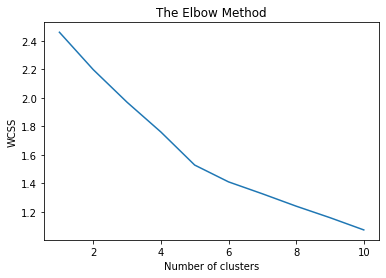

In [87]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(mumbai_grouped.drop('Neighborhood',axis=1))
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Hence as per analysis the appropriate value of k taken is k=4 for defining the number of clusters.

In [88]:
len(mumbai_grouped[mumbai_grouped["Shopping Mall"] > 0])

32

In [89]:
mumbai_mall = mumbai_grouped[["Neighborhood","Shopping Mall"]]

In [90]:
mumbai_mall.head()

,Neighborhood,Shopping Mall
0,Aarey Milk Colony,0.066667
1,Agripada,0.000000
2,Altamount Road,0.000000
3,Amboli,0.000000
4,Amrut Nagar,0.011236


# 11)Cluster Neighborhoods


In [91]:
# set number of clusters
kclusters = 4

mumbai_clustering = mumbai_mall.drop(["Neighborhood"], 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(mumbai_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([1, 2, 2, 2, 0, 3, 2, 2, 3, 1], dtype=int32)

In [92]:
# create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.
mumbai_merged = mumbai_mall.copy()

# add clustering labels
mumbai_merged["Cluster Labels"] = kmeans.labels_

In [93]:
mumbai_merged.rename(columns={"Neighborhood": "Neighborhood"}, inplace=True)
mumbai_merged.head()

,Neighborhood,Shopping Mall,Cluster Labels
0,Aarey Milk Colony,0.066667,1
1,Agripada,0.000000,2
2,Altamount Road,0.000000,2
3,Amboli,0.000000,2
4,Amrut Nagar,0.011236,0


In [94]:
# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
mumbai_merged = mumbai_merged.join(mum_df.set_index("Neighborhood"), on="Neighborhood")

print(mumbai_merged.shape)
mumbai_merged.head() # check the last columns!

(93, 6)


,Neighborhood,Shopping Mall,Cluster Labels,Location,Latitude,Longitude
0,Aarey Milk Colony,0.066667,1,Western Suburbs,19.1703,72.8711
1,Agripada,0.000000,2,South Mumbai,18.9763,72.8262
2,Altamount Road,0.000000,2,South Mumbai,18.9643,72.8078
3,Amboli,0.000000,2,Western Suburbs,19.1293,72.8464
4,Amrut Nagar,0.011236,0,Eastern Suburbs,19.1452,72.8467


In [95]:
# sort the results by Cluster Labels
print(mumbai_merged.shape)
mumbai_merged.sort_values(["Cluster Labels"], inplace=True)
mumbai_merged

(93, 6)


,Neighborhood,Shopping Mall,Cluster Labels,Location,Latitude,Longitude
46,Juhu,0.010000,0,Western Suburbs,19.0149,72.8452
90,Virar,0.012658,0,Western Suburbs,19.0166,72.8585
89,Vile Parle,0.011236,0,Western Suburbs,19.0962,72.8502
4,Amrut Nagar,0.011236,0,Eastern Suburbs,19.1452,72.8467
86,Versova,0.010000,0,Western Suburbs,19.1377,72.8135
68,Naigaon,0.011236,0,Western Suburbs,19.0119,72.8453
64,Matunga,0.010989,0,South Mumbai,19.0272,72.8559
51,Khar Danda,0.010000,0,Western Suburbs,19.0843,72.8269
50,Kemps Corner,0.010000,0,South Mumbai,18.9647,72.8054
45,Jogeshwari West,0.010000,0,Western Suburbs,19.1412,72.8433


# 12)Create a map of MUMBAI CITY with all 4 Clusters superimposed on top

In [96]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(mumbai_merged['Latitude'], mumbai_merged['Longitude'], mumbai_merged['Neighborhood'], mumbai_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' - Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

# 13)Examine Clusters

# Cluster 1

In [97]:
mumbai_merged.loc[mumbai_merged['Cluster Labels'] == 0]

,Neighborhood,Shopping Mall,Cluster Labels,Location,Latitude,Longitude
46,Juhu,0.010000,0,Western Suburbs,19.0149,72.8452
90,Virar,0.012658,0,Western Suburbs,19.0166,72.8585
89,Vile Parle,0.011236,0,Western Suburbs,19.0962,72.8502
4,Amrut Nagar,0.011236,0,Eastern Suburbs,19.1452,72.8467
86,Versova,0.010000,0,Western Suburbs,19.1377,72.8135
68,Naigaon,0.011236,0,Western Suburbs,19.0119,72.8453
64,Matunga,0.010989,0,South Mumbai,19.0272,72.8559
51,Khar Danda,0.010000,0,Western Suburbs,19.0843,72.8269
50,Kemps Corner,0.010000,0,South Mumbai,18.9647,72.8054
45,Jogeshwari West,0.010000,0,Western Suburbs,19.1412,72.8433


# Cluster 2

In [98]:
mumbai_merged.loc[mumbai_merged['Cluster Labels'] == 1]

,Neighborhood,Shopping Mall,Cluster Labels,Location,Latitude,Longitude
87,Vidyavihar,0.052632,1,Eastern Suburbs,19.08,72.8973
83,Thakur village,0.057692,1,Western Suburbs,19.2102,72.8754
71,Navy Nagar,0.043478,1,South Mumbai,18.906,72.8155
49,Kanjurmarg,0.047619,1,Eastern Suburbs,19.1314,72.9357
23,Cotton Green,0.045455,1,South Mumbai,18.9862,72.8412
0,Aarey Milk Colony,0.066667,1,Western Suburbs,19.1703,72.8711
9,Bhandup,0.047619,1,Eastern Suburbs,19.1456,72.9486
13,C.G.S. colony,0.058824,1,South Mumbai,19.1389,72.9382


# Cluster 3

In [99]:
mumbai_merged.loc[mumbai_merged['Cluster Labels'] == 2]

,Neighborhood,Shopping Mall,Cluster Labels,Location,Latitude,Longitude
10,Bhayandar,0.0,2,Western Suburbs,19.3074,72.8518
52,Kherwadi,0.0,2,Western Suburbs,19.0595,72.8455
53,Lokhandwala,0.0,2,Western Suburbs,19.1432,72.8249
16,"Chakala, Andheri",0.0,2,Western Suburbs,19.1084,72.8623
55,Mahalaxmi,0.0,2,South Mumbai,18.9469,72.8289
56,Mahavir Nagar,0.0,2,Western Suburbs,19.2113,72.8414
57,Mahim,0.0,2,South Mumbai,19.0407,72.8431
58,Mahul,0.0,2,Harbour Suburbs,19.0454,72.8932
59,Malabar Hill,0.0,2,South Mumbai,18.95,72.795
60,Mankhurd,0.0,2,Harbour Suburbs,19.0485,72.9322


# Cluster 4

In [100]:
mumbai_merged.loc[mumbai_merged['Cluster Labels'] == 3]

,Neighborhood,Shopping Mall,Cluster Labels,Location,Latitude,Longitude
88,Vikhroli,0.022222,3,Eastern Suburbs,19.1111,72.9278
5,Asalfa,0.032258,3,Eastern Suburbs,19.0953,72.8926
54,Lower Parel,0.020000,3,South Mumbai,18.9981,72.8281
76,Parel,0.030000,3,South Mumbai,18.9957,72.84
75,Pant Nagar,0.037037,3,Eastern Suburbs,19.0863,72.915
72,Nehru Nagar,0.020000,3,Eastern Suburbs,19.0005,72.8228
8,Bangur Nagar,0.030000,3,Western Suburbs,19.1674,72.8323
30,Dava Bazaar,0.026316,3,South Mumbai,19.1314,72.927
28,Dagdi Chawl,0.024390,3,South Mumbai,18.9771,72.8291
26,Currey Road,0.021277,3,South Mumbai,18.9952,72.8346


## 12)Observations

  In this project, we have gone through the process of identifying the business problem, specifying the data required, extracting and preparing the data, performing machine learning by clustering the data into 4 clusters based on their similarities, and lastly providing recommendations to the relevant stakeholders i.e. property developers and investors regarding the best locations to open a new shopping mall. 
  
  To answer the business question that was raised in the introduction section, the answer proposed by this project is: The neighbourhoods in **Cluster 1** are the most preferred locations to open a new shopping mall. The findings of this project will help the relevant stakeholders to capitalize on the opportunities on high potential locations while avoiding overcrowded areas in their decisions to open a new shopping mall.

  The stakeholders and investors can further tune this by considering various other factors like transport, legal requirements, and costs associated. These were out of the scope for this project and thus were not considered.
